# k-近邻算法的一般流程
### （1）收集数据：可以使用任何方法
### （2）准备数据：距离计算所需的数值，最好是结构化的数据格式
### （3）分析数据：可以使用任何方法
### （4）训练算法：此步骤不适用于k-近邻算法
### （5）测试算法：计算机错误率
### （6）使用算法：首先需要输入样本数据和结构化的输出结果，然后运行k-近邻算法判定输入数据分别属于哪个分类，最后应用对计算出的分类执行后续的处理


In [2]:
from  numpy import *
import operator

# 函数功能：创建数据集和标签
def createDataSet():
    group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group,labels


In [3]:
group,labels = createDataSet()

In [4]:
group

array([[ 1. ,  1.1],
       [ 1. ,  1. ],
       [ 0. ,  0. ],
       [ 0. ,  0.1]])

In [5]:
labels

['A', 'A', 'B', 'B']

## k-近邻算法的伪代码
####  对未知类别属性的数据集中的每一个点一次执行以下操作：
#### （1）计算机已知类别数据集中的点与当前点之间的距离；
#### （2）按照距离递增次序排序；
#### （3）选取与当前点距离最小的k个点；
#### （4）确定前k点所在类别的出现频率
#### （5）返回前k个点出现频率最高的类别作为当前点的预测分类

# 程序清单2-1 k-近邻算法

In [6]:
'''
Created on 2019-6-29
kNN: k Nearest Neighbors k-近邻算法

Input:      inX: vector to compare to existing dataset (1xN) 用于分类的输入向量
            dataSet: size m data set of known vectors (NxM) 输入的训练样本集
            labels: data set labels (1xM vector) 标签向量，元素数目和矩阵dataSet 行数相同
            k: number of neighbors to use for comparison (should be an odd number) 用于选择最近邻居的数目，
            
            
Output:     the most popular class label 最近接近的标签

@author: liuxf570

'''
def classify0(inX,dataSet,labels,k):
    #print(dataSet)
    dataSetSize = dataSet.shape[0]
    #print(dataSetSize)
    #print(tile(inX,(dataSetSize,1)))
    diffMat = tile(inX, (dataSetSize,1)) - dataSet
    #Numpy的 tile() 函数，就是将原矩阵横向、纵向地复制。tile 是瓷砖的意思，顾名思义，这个函数就是把数组像瓷砖一样铺展开来。print
   
    #print(diffMat)
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)       #axis 按行统计相加
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()#argsort函数返回的是数组值从小到大的索引值
   #print(sqDiffMat)
    #print(sqDistances)
   # print(distances)
   # print(sortedDistIndicies)
    # 以上为计算距离
    # 选择距离最小的k个点
    classCount={}   #字典
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        #print(voteIlabel)
        classCount[voteIlabel] = classCount.get(voteIlabel,0)+1
        #print(classCount.get(voteIlabel,0))
        #print(classCount[voteIlabel])
    #sortedClassCount = sorted(classCount.iteritems(),key=operator.itemgetter(1),reverse=True)
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    #classCount.iteritems()将classCount字典分解为元组列表，operator.itemgetter(1)按照第二个元素的次序对元组进行排序，
    #reverse=True是逆序，即按照从大到小的顺序排列
    #print(sortedClassCount[0][0])
    #print(sortedClassCount)
    return sortedClassCount[0][0]

classify0([0,0],group,labels,3)

          

          
    

'B'

In [7]:
import operator
dict = {}
dict['A'] = 2
dict['B'] = 1
dict['C'] = 3
print (dict)
Countlabels_max = sorted(dict.items(), key=operator.itemgetter(1), reverse=True)#使用itemgetter()从元组记录中取回特定的字段：
print(Countlabels_max)



{'A': 2, 'B': 1, 'C': 3}
[('C', 3), ('A', 2), ('B', 1)]


operator模块中为我们提供了大量可以用来替代代数操作符的函数来，除了代数运算符，operator模块中另两个非常重要的方法是itemgetter和attrgetter。这两个函数可以从一个序列或者对象中去获取指定的元素或属性值。我们再来看一个例子，将一个元组列表按元组中的值排序。为此，我们使用itemgetter(1)来生成一个函数去获取元组中的第一个值，其效果等同于lambda函数lambda fields: fields[1]。



# 程序清单2-2 将文本记录转换为NumPy的解析程序

In [8]:
def file2matrix(filename):
    fr = open(filename)
    arrayOLines = fr.readlines()
   # print(arrayOLines)
    numberOfLines = len(arrayOLines)  #1得到文本行数
  #  print(numberOfLines)
    returnMat = zeros((numberOfLines,3))
    classLabelVector = []      #2创建返回的NumPy矩阵
    index  = 0     
    for line in arrayOLines:  #3解析文件数据列表
        line = line.strip() 
        # Python strip() 方法用于移除字符串头尾指定的字符（默认为空格或换行符）或字符序列。 
        #注意：该方法只能删除开头或是结尾的字符，不能删除中间部分的字符。
        listFormLine = line.split('\t')
       # print(listFormLine)
        returnMat[index,:] = listFormLine[0:3]
        classLabelVector.append(int(listFormLine[-1]))
        index +=1        
    return returnMat,classLabelVector

        
datingDataMat,datingLabels=file2matrix('datingTestSet2.txt')
print(datingDataMat)
print(datingLabels)

[[  4.09200000e+04   8.32697600e+00   9.53952000e-01]
 [  1.44880000e+04   7.15346900e+00   1.67390400e+00]
 [  2.60520000e+04   1.44187100e+00   8.05124000e-01]
 ..., 
 [  2.65750000e+04   1.06501020e+01   8.66627000e-01]
 [  4.81110000e+04   9.13452800e+00   7.28045000e-01]
 [  4.37570000e+04   7.88260100e+00   1.33244600e+00]]
[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 1, 3, 1, 2, 1, 1, 2, 3, 3, 1, 2, 3, 3, 3, 1, 1, 1, 1, 2, 2, 1, 3, 2, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 2, 3, 2, 3, 1, 2, 3, 2, 2, 1, 3, 1, 1, 3, 3, 1, 2, 3, 1, 3, 1, 2, 2, 1, 1, 3, 3, 1, 2, 1, 3, 3, 2, 1, 1, 3, 1, 2, 3, 3, 2, 3, 3, 1, 2, 3, 2, 1, 3, 1, 2, 1, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 3, 3, 1, 2, 2, 1, 1, 3, 2, 3, 3, 1, 2, 1, 3, 1, 2, 3, 2, 3, 1, 1, 1, 3, 2, 3, 1, 3, 2, 1, 3, 2, 2, 3, 2, 3, 2, 1, 1, 3, 1, 3, 2, 2, 2, 3, 2, 2, 1, 2, 2, 3, 1, 3, 3, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 1, 1, 1, 2

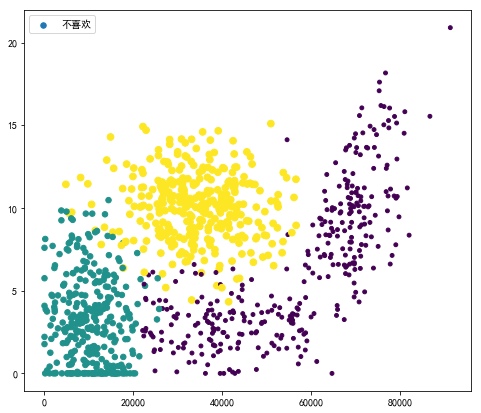

In [9]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,7))
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus']=False
ax = fig.add_subplot(111)
#ax.scatter(datingDataMat[:,1],datingDataMat[:,2])
ax.scatter(datingDataMat[:,0],datingDataMat[:,1],15.0*array(datingLabels),15.0*array(datingLabels))
#plt.scatter(datingDataMat[:,1],datingDataMat[:,2],15.0*array(datingLabels),15.0*array(datingLabels))
#plt.scatter(datingDataMat[:,0],datingDataMat[:,2],15.0*array(datingLabels),15.0*array(datingLabels))
plt.legend(['不喜欢','魅力一般','极具魅力'])  # 图例这里有点问题，为什么只显示一种？
plt.show()

# 程序清单2-3 归一化特征值

In [10]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    #print(minVals)
    #print(maxVals)
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
   #print(normDataSet)
    m = dataSet.shape[0]
    #print(m)
    normDataSet = dataSet - tile(minVals,(m,1))   # newval =(oldValue - min )/(max -min) 数值归一化
    normDataSet = normDataSet/tile(ranges,(m,1))
    return normDataSet,ranges,minVals

normMat,ranges,minVals=autoNorm(datingDataMat)
print(normMat)
print(ranges)
print(minVals)

[[ 0.44832535  0.39805139  0.56233353]
 [ 0.15873259  0.34195467  0.98724416]
 [ 0.28542943  0.06892523  0.47449629]
 ..., 
 [ 0.29115949  0.50910294  0.51079493]
 [ 0.52711097  0.43665451  0.4290048 ]
 [ 0.47940793  0.3768091   0.78571804]]
[  9.12730000e+04   2.09193490e+01   1.69436100e+00]
[ 0.        0.        0.001156]


# 程序清单2-4 分类器针对约会网站的测试代码

In [11]:
def datingClassTest():
    hoRatio = 0.10
    datingDataMat,datingLabels=file2matrix('datingTestSet2.txt')
    normMat,ranges,minVals=autoNorm(datingDataMat)
    m = normMat.shape[0] # 1000
    print(m)
    numTestVecs = int(m*hoRatio)
    print(numTestVecs)
    errorCount = 0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        print ("the classifier came back with:%d,the real answer is :%d" % (classifierResult,datingLabels[i]))
        if(classifierResult != datingLabels[i]):
            errorCount += 1.0
    print ("the total error rate is:%f" % (errorCount/float(numTestVecs)))
        
datingClassTest()

1000
100
the classifier came back with:3,the real answer is :3
the classifier came back with:2,the real answer is :2
the classifier came back with:1,the real answer is :1
the classifier came back with:1,the real answer is :1
the classifier came back with:1,the real answer is :1
the classifier came back with:1,the real answer is :1
the classifier came back with:3,the real answer is :3
the classifier came back with:3,the real answer is :3
the classifier came back with:1,the real answer is :1
the classifier came back with:3,the real answer is :3
the classifier came back with:1,the real answer is :1
the classifier came back with:1,the real answer is :1
the classifier came back with:2,the real answer is :2
the classifier came back with:1,the real answer is :1
the classifier came back with:1,the real answer is :1
the classifier came back with:1,the real answer is :1
the classifier came back with:1,the real answer is :1
the classifier came back with:1,the real answer is :1
the classifier came

# 程序清单2-5 约会网站预测函数


In [12]:
def classifyPerson():
    resultList = ['not at all','in small doses','in large doses']
    percentTats = float(input("percentage of time spent playing video games?"))
    ffMiles=float(input("frequent flier miles earned per year?"))
    iceCream = float(input("liters of ice cream consumed per year?"))
    datingDataMat,datingLabels=file2matrix('datingTestSet2.txt')
    normMat,ranges,minVals=autoNorm(datingDataMat)
    intArr=array([ffMiles,percentTats,iceCream])
    print(intArr)
    classifierResult = classify0((intArr-minVals)/ranges,normMat,datingLabels,3)
    print("you will probaly like this person ",resultList[int(classifierResult)- 1])
    #print(resultList[int(classifierResult)- 1])
classifyPerson()

percentage of time spent playing video games?10
frequent flier miles earned per year?1000
liters of ice cream consumed per year?0.5
[  1.00000000e+03   1.00000000e+01   5.00000000e-01]
you will probaly like this person  in small doses


In [14]:
'''
Created on Sep 16, 2010
kNN: k Nearest Neighbors

Input:      inX: vector to compare to existing dataset (1xN)
            dataSet: size m data set of known vectors (NxM)
            labels: data set labels (1xM vector)
            k: number of neighbors to use for comparison (should be an odd number)
            
Output:     the most popular class label

@author: pbharrin
'''

from numpy import *
import operator
from os import listdir


def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()   
    #sortedDistIndicies = numpy.argsort(distance)   
    classCount={}          
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    #sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]


def createDataSet():
    group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group, labels


def file2matrix(filename):
    fr = open(filename)
    numberOfLines = len(fr.readlines())         #get the number of lines in the file
    returnMat = zeros((numberOfLines,3))        #prepare matrix to return
    classLabelVector = []                       #prepare labels return   
    #fr = open(filename)
    fr.seek(0)
    index = 0
    for line in fr.readlines():
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        #classLabelVector.append(int(listFromLine[-1]))
        classLabelVector.append((listFromLine[-1]))
        index += 1
    return returnMat,classLabelVector
    
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals, (m,1))
    normDataSet = normDataSet/tile(ranges, (m,1))   #element wise divide
    return normDataSet, ranges, minVals
   
def datingClassTest():
    hoRatio = 0.50      #hold out 10%
    datingDataMat,datingLabels = file2matrix('datingTestSet2.txt')       #load data setfrom file
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        print ("the classifier came back with: %d, the real answer is: %d", (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): errorCount += 1.0
    print ("the total error rate is: %f",(errorCount/float(numTestVecs)))
    print (errorCount)
    
def img2vector(filename):
    returnVect = zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

def handwritingClassTest():
    hwLabels = []
    trainingFileList = listdir('trainingDigits')           #load the training set
    m = len(trainingFileList)
    trainingMat = zeros((m,1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]     #take off .txt
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i,:] = img2vector('trainingDigits/%s' % fileNameStr)
    testFileList = listdir('testDigits')        #iterate through the test set
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]     #take off .txt
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('testDigits/%s' % fileNameStr)
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        print ("the classifier came back with: %d, the real answer is: %d",(classifierResult, classNumStr))
        if (classifierResult != classNumStr): errorCount += 1.0
    print ("\nthe total number of errors is: %d",errorCount)
    print ("\nthe total error rate is: %f",errorCount/float(mTest))

#  准备数据：将图像转换为测试向量

In [19]:
# 该函数将图像转换为向量，创建1*1024的NumPy数组，然后打开给定的文件，循环读出文件的前32行，
# 并将每行的头32个字符存储在NumPy数组中,最后返回数组
def  img2vector(filename):
    returnVect = zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect
testVector = img2vector('testDigits/0_13.txt')
print(testVector[0,0:31])
print(testVector[0,32:63])



[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


#  程序清单2-6 使用k-近邻算法识别手写数字代码

In [20]:
from os import listdir
def handwritingClassTest():
    hwLabels = []
    trainingFileList = listdir('trainingDigits') #获取目录内容
    m = len(trainingFileList)
    trainingMat = zeros((m,1024))
    for i in range(m):                      #从文件名解析分类数字 文件名 0_0.txt
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]    #0_0
        classNumStr = int(fileStr.split('_')[0])  #0
        hwLabels.append(classNumStr)
        trainingMat[i,:] = img2vector('trainingDigits/%s' % fileNameStr)
    testFileList = listdir('testDigits')
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]    #0_0
        classNumStr = int(fileStr.split('_')[0])  #0
        vectorUnderTest =   img2vector('testDigits/%s' % fileNameStr)
        classifierResult = classify0(vectorUnderTest,trainingMat,hwLabels,3) 
        # 参数说明：1 用于分类的输入向量 # 2 输入训练样本集 3 标签向量，4用于选择最近邻居的数目
        print("the classifier came back with %d,the real anser is %d" % (classifierResult,classNumStr))
        if(classifierResult != classNumStr): 
            errorCount += 1.0
    print("\n the total number of the errors is %d" % errorCount)
    print("\n the total error rate is: %f" % (errorCount/float(mTest)))
        